# Data Exploration and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MULTIMODAL SENTIMENT ANALYSIS/Copy of train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#dropping nan values if any
for i in range(len(df)):
  if pd.isna(df.loc[i,'text']) or pd.isna(df.loc[i,'target']):
    df.drop(i,inplace=True)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


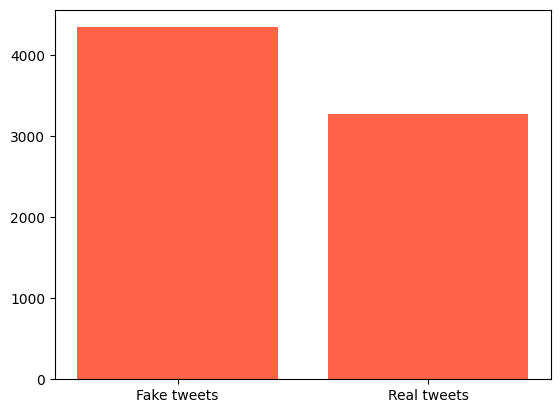

In [ ]:
# bar graph
x=np.array(["Fake tweets","Real tweets"])
y=np.zeros(2)
for i in range(len(df)):
  if df.loc[i,'target']==0:
    y[0]+=1
  else:
    y[1]+=1
plt.bar(x,y,color="tomato")
plt.show()

# Text Preprocessing

In [ ]:
import re
# removing punctuation, special characters, and numbers using regex
for i in range(len(df)):
  df.loc[i,'text']=re.sub(r'[^\w\s]','',df.loc[i,'text'])
  df.loc[i,'text']=re.sub(r'[-_\d]','',df.loc[i,'text'])
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,ariaahrary TheTawniest The out of control wild...,1
7610,10871,NaN,NaN,M UTCkm S of Volcano Hawaii httptcozDtoydEbJ,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1


In [ ]:
# removing stopwords and converting into lower case
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
for i in range(len(df)):
  df.loc[i,'text']=df.loc[i,'text'].lower()
  words=nltk.word_tokenize(df.loc[i,'text'])
  words=[word for word in words if word not in nltk.corpus.stopwords.words('english')]
  df.loc[i,'text']=" ".join(words)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1
7610,10871,NaN,NaN,utckm volcano hawaii httptcozdtoydebj,1
7611,10872,NaN,NaN,police investigating ebike collided car little...,1


In [ ]:
# lemmatization
import spacy
from collections import Counter
nlp =spacy.load('en_core_web_sm')
for i in range(len(df)):
  doc=nlp(df.loc[i,'text'])
  lemmatized_text=[token.lemma_ for token in doc]
  token_freq = Counter(lemmatized_text)
  df.loc[i,'text']=" ".join(lemmatized_text)
df

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive we,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,get send photo ruby alaska smoke wildfire pour...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridge collapse nearby ho...,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fire calif...,1
7610,10871,NaN,NaN,utckm volcano hawaii httptcozdtoydebj,1
7611,10872,NaN,NaN,police investigate ebike collide car little po...,1


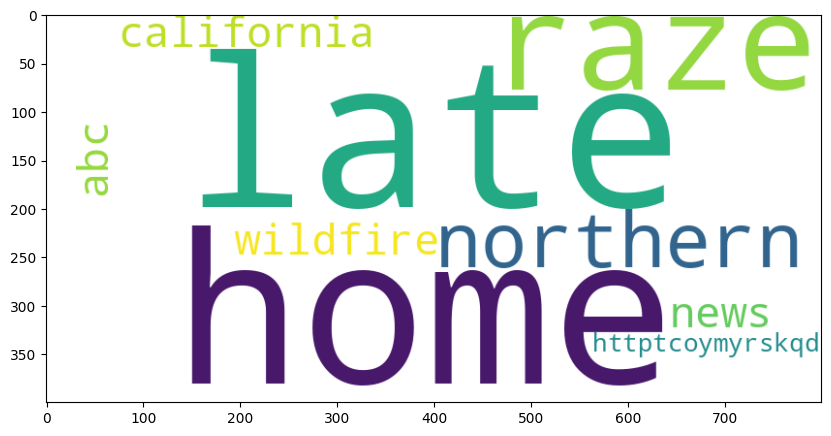

In [ ]:
import wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words = 50).generate_from_frequencies(token_freq)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Feature Extraction

In [ ]:
# preprocessing using BERT
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embeddings(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=256)

    with torch.no_grad():
        outputs = model(**inputs)

    last_hidden_state = outputs.last_hidden_state

    embeddings = last_hidden_state[:, 0, :].squeeze().numpy()

    return embeddings


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
df['bert_embeddings'] = df['text'].map(bert_embeddings)
df

,id,keyword,location,text,target,bert_embeddings
0,1,NaN,NaN,deed reason earthquake may allah forgive we,1,"[-0.31640995, 0.38492057, -0.115232095, -0.179..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[-0.7277823, -0.01563823, -0.51398313, -0.3064..."
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1,"[-0.37480697, -0.12759182, 0.2626965, -0.24057..."
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1,"[-0.45560783, 0.111479305, 0.05454348, -0.1017..."
4,7,NaN,NaN,get send photo ruby alaska smoke wildfire pour...,1,"[-0.13063437, -0.062055554, 0.07140931, 0.1003..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridge collapse nearby ho...,1,"[-0.5481564, -0.01594579, 0.051168814, -0.3640..."
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fire calif...,1,"[-0.6693719, -0.08345304, -0.13528931, 0.07485..."
7610,10871,NaN,NaN,utckm volcano hawaii httptcozdtoydebj,1,"[-0.5997376, -0.029475044, 0.17639177, -0.0368..."
7611,10872,NaN,NaN,police investigate ebike collide car little po...,1,"[-0.48650518, -0.049237028, 0.16560063, -0.057..."


In [ ]:
from sklearn.model_selection import train_test_split
tweets = np.array(df['bert_embeddings'].tolist())
target = np.array(df['target'].tolist())
tweets

array([[-0.31640995,  0.38492057, -0.1152321 , ..., -0.2421414 ,
         0.17810728,  0.16317587],
       [-0.7277823 , -0.01563823, -0.51398313, ..., -0.07747041,
        -0.13023579,  0.27211297],
       [-0.37480697, -0.12759182,  0.2626965 , ..., -0.280141  ,
        -0.07378051,  0.597067  ],
       ...,
       [-0.5997376 , -0.02947504,  0.17639177, ..., -0.10369021,
         0.2904289 ,  0.61952686],
       [-0.48650518, -0.04923703,  0.16560063, ..., -0.26868618,
        -0.0293905 ,  0.43471196],
       [-0.46967784, -0.07975388, -0.02414167, ..., -0.22530523,
         0.41911522,  0.13810082]], dtype=float32)

# Model **Building**

In [ ]:
# splitting the data
tweets_train,tweets_test,target_train,target_test=train_test_split(tweets,target,test_size=0.2,random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
def plot_curves(model,X_test,y_test,model_name):
    # Predict probabilities and classes
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    y_pred = model.predict(X_test)
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    # Subplot 1: ROC Curve
    axs[0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    axs[0].plot([0, 1], [0, 1], 'k--', label='Random Guess')
    axs[0].set_title('ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    # Subplot 2: Precision-Recall Curve
    axs[1].plot(recall, precision, label=model_name)
    axs[1].set_title('Precision-Recall Curve')
    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].legend(loc='lower left')
    # Subplot 3: Confusion Matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[2], colorbar=False)
    axs[2].set_title('Confusion Matrix')
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

logi_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none'],
    'max_iter': [500, 1000,2000]
}

logi_reg = LogisticRegression()

logi_grid_search = GridSearchCV(estimator=logi_reg, param_grid=logi_param_grid, cv=5, scoring='accuracy', verbose=1)

logi_grid_search.fit(tweets_train, target_train)

logi_best_params = logi_grid_search.best_params_
logi_best_model = logi_grid_search.best_estimator_

logi_best_params

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
logi_target_pred = logi_best_model.predict(tweets_test)
accuracy = accuracy_score(target_test, logi_target_pred)
accuracy

0.7905449770190414

In [ ]:
# Classification report
print(classification_report(target_test, logi_target_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       874
           1       0.76      0.73      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



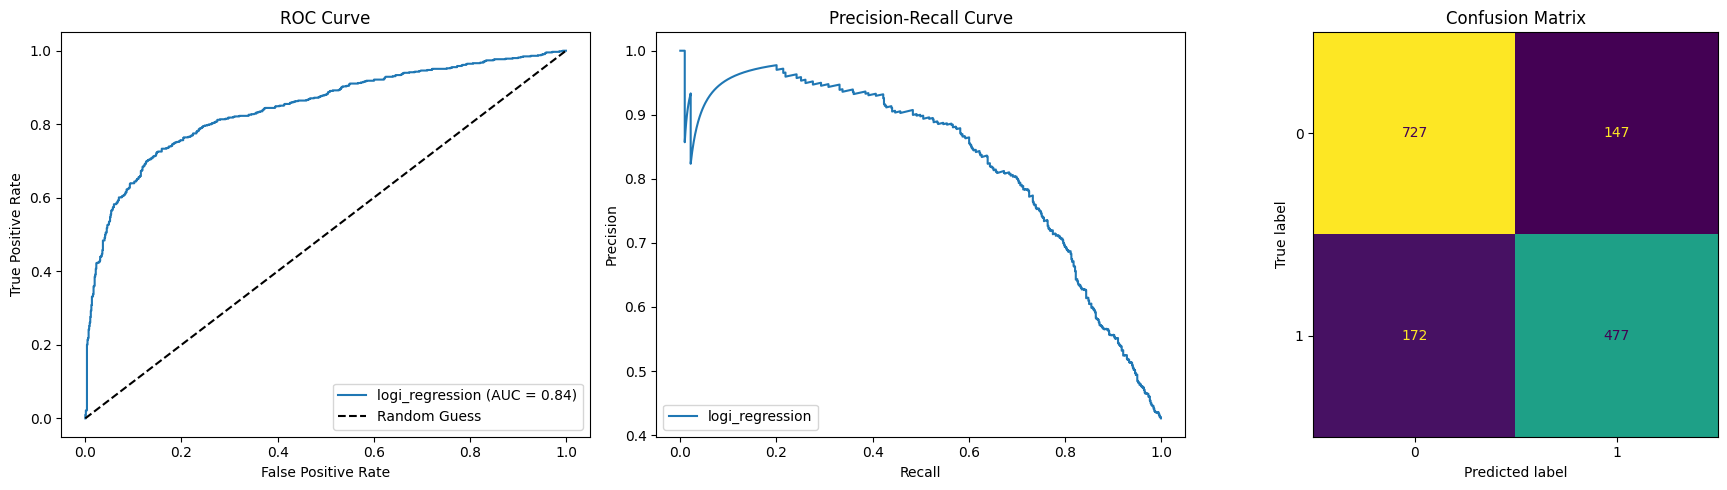

In [ ]:
plot_curves(logi_best_model,tweets_test,target_test,"logi_regression")

## NAIVE BAYES

In [ ]:
from sklearn import naive_bayes
#inputs of gaussianNB can be negative.So,used  gaussian
nb_model = naive_bayes.GaussianNB()

nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Range for smoothing parameter
}

nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, cv=5, scoring='accuracy', verbose=1)
nb_grid_search.fit(tweets_train, target_train)

nb_best_params = nb_grid_search.best_params_
nb_best_model = nb_grid_search.best_estimator_

nb_best_params

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'var_smoothing': 1e-09}

In [ ]:
nb_target_pred = nb_best_model.predict(tweets_test)
accuracy = accuracy_score(target_test, nb_target_pred)
accuracy

0.6940249507550886

In [ ]:
print(classification_report(target_test, nb_target_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       874
           1       0.62      0.73      0.67       649

    accuracy                           0.69      1523
   macro avg       0.69      0.70      0.69      1523
weighted avg       0.71      0.69      0.70      1523



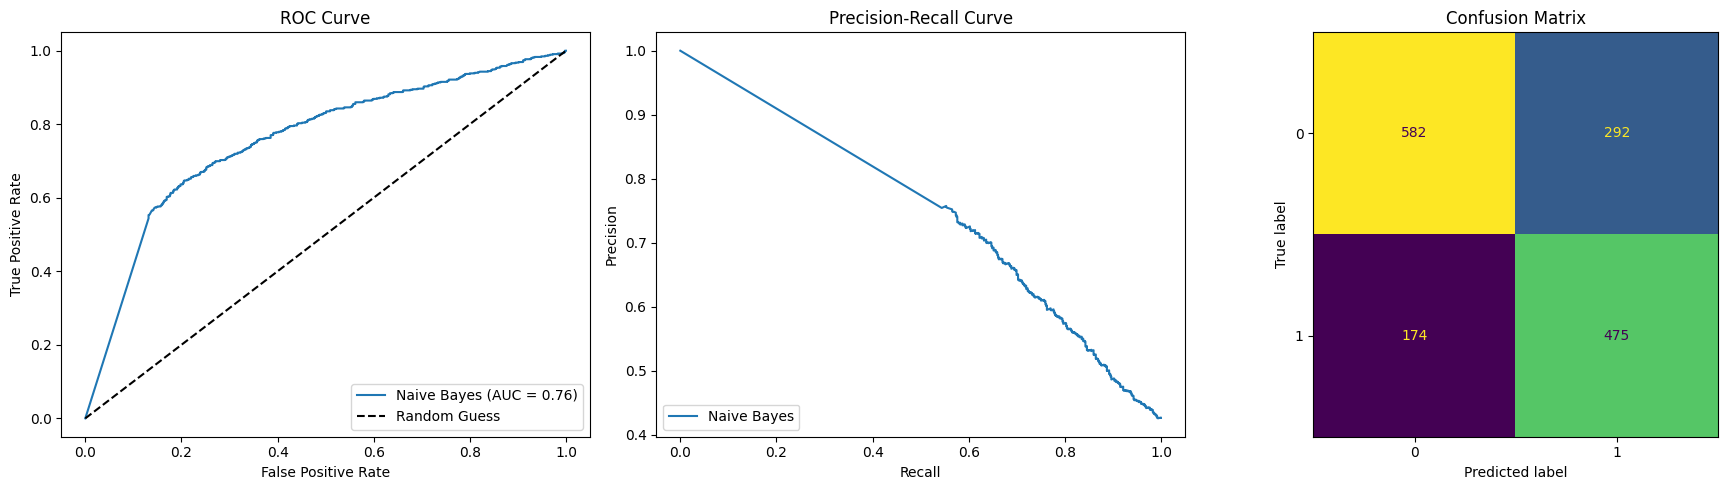

In [ ]:
plot_curves(nb_best_model,tweets_test,target_test,'Naive Bayes')

## SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1,10, 100],               # Regularization parameter
    'kernel': ['linear','rbf'],  # Kernel types
}

svm_model = SVC()
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', verbose=1)
svm_grid_search.fit(tweets_train, target_train)

svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_

svm_best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 10, 'kernel': 'rbf'}

In [ ]:
svm_target_pred = svm_best_model.predict(tweets_test)
accuracy = accuracy_score(target_test, svm_target_pred)
accuracy

0.8069599474720945

In [ ]:
print(classification_report(target_test, svm_target_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.72      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



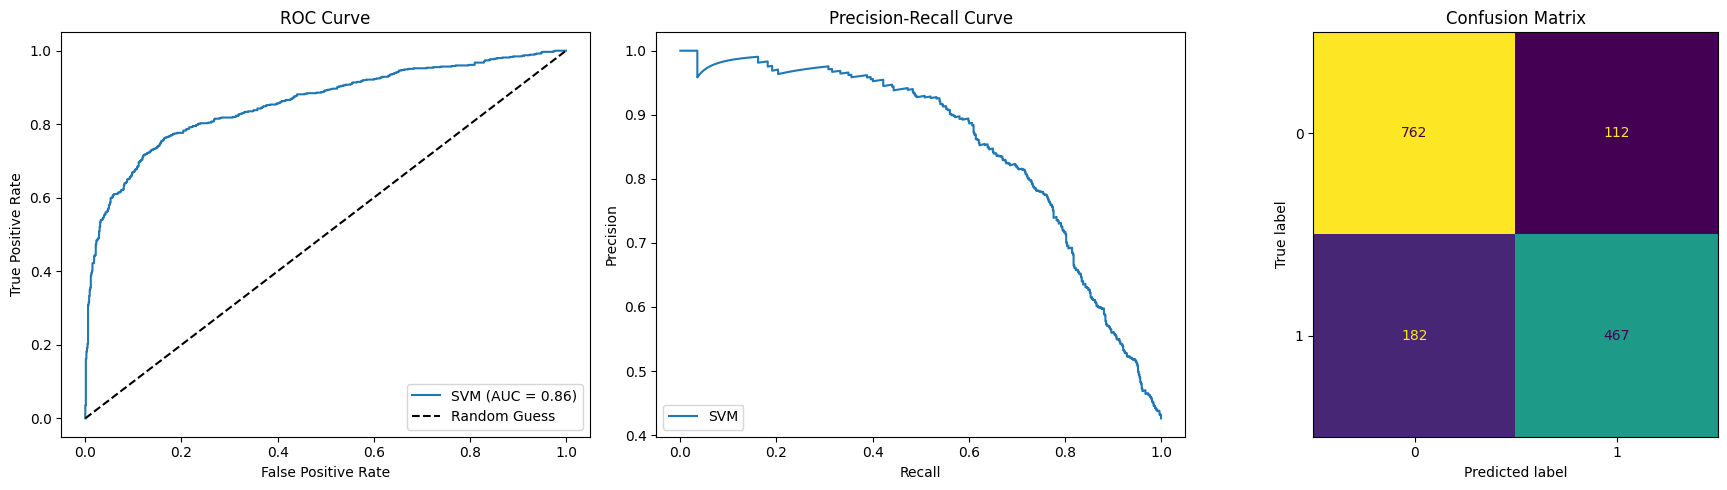

In [ ]:
plot_curves(svm_best_model,tweets_test,target_test,'SVM')

# TEST DATASET


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MULTIMODAL SENTIMENT ANALYSIS/Copy of test.csv')
df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
for i in range(len(df)):
  if pd.isna(df.loc[i,'text']):
    df.drop(i,inplace=True)
df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
import re
for i in range(len(df)):
  df.loc[i,'text']=re.sub(r'[^\w\s]','',df.loc[i,'text'])
  df.loc[i,'text']=re.sub(r'[-_\d]','',df.loc[i,'text'])
df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...
3260,10868,NaN,NaN,Green Line derailment in Chicago httptcoUtbXLc...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO httpt...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
for i in range(len(df)):
  df.loc[i,'text']=df.loc[i,'text'].lower()
  words=nltk.word_tokenize(df.loc[i,'text'])
  words=[word for word in words if word not in nltk.corpus.stopwords.words('english')]
  df.loc[i,'text']=" ".join(words)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety fasten...
3259,10865,NaN,NaN,storm ri worse last hurricane cityampothers ha...
3260,10868,NaN,NaN,green line derailment chicago httptcoutbxlcbiuy
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo httpt...


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embeddings(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=256)

    with torch.no_grad():
        outputs = model(**inputs)

    last_hidden_state = outputs.last_hidden_state

    embeddings = last_hidden_state[:, 0, :].squeeze().numpy()

    #embeddings=scaler.fit_transform(embeddings.reshape(1,-1))
    return embeddings


In [ ]:
df['bert_embeddings'] = df['text'].map(bert_embeddings)
df

,id,keyword,location,text,bert_embeddings
0,0,NaN,NaN,happened terrible car crash,"[-0.5366741, -0.034452897, -0.42487082, 0.1459..."
1,2,NaN,NaN,heard earthquake different cities stay safe ev...,"[-0.21679428, 0.2081198, 0.11592197, -0.228194..."
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...,"[-0.74661016, 0.038850207, -0.3053326, 0.04641..."
3,9,NaN,NaN,apocalypse lighting spokane wildfires,"[-0.548522, -0.023543114, -0.21109663, -0.1969..."
4,11,NaN,NaN,typhoon soudelor kills china taiwan,"[-0.519544, 0.28404975, -0.099404596, -0.10149..."
...,...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety fasten...,"[-0.30875203, 0.07323773, 0.17043583, 0.086657..."
3259,10865,NaN,NaN,storm ri worse last hurricane cityampothers ha...,"[-0.035428673, 0.05841016, 0.48311818, -0.0744..."
3260,10868,NaN,NaN,green line derailment chicago httptcoutbxlcbiuy,"[-0.36325678, -0.24804768, -0.15715675, 0.0968..."
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo httpt...,"[-0.8485633, -0.05326562, 0.3473389, -0.004924..."


In [ ]:
test_tweets = np.array(df['bert_embeddings'].tolist())
test_tweets

array([[-0.5366741 , -0.0344529 , -0.42487082, ..., -0.5039371 ,
         0.31711167,  0.2601774 ],
       [-0.21679428,  0.2081198 ,  0.11592197, ..., -0.5625595 ,
         0.26959464,  0.09073358],
       [-0.74661016,  0.03885021, -0.3053326 , ..., -0.26323265,
         0.20677009,  0.10349658],
       ...,
       [-0.36325678, -0.24804768, -0.15715675, ..., -0.23441783,
         0.18591012,  0.39274046],
       [-0.8485633 , -0.05326562,  0.3473389 , ..., -0.41502637,
         0.07490223,  0.3109266 ],
       [-0.5275588 , -0.07397367,  0.22535504, ..., -0.41124392,
         0.11304551,  0.34798372]], dtype=float32)

In [ ]:
predictions = svm_best_model.predict(test_tweets)

predictions = pd.DataFrame(predictions, columns=['Predicted Values'])

predictions.to_csv('/content/drive/MyDrive/MULTIMODAL SENTIMENT ANALYSIS/submission.csv')